In [1]:
import os
import sys
sys.path.append(os.path.abspath('../../'))

sys.path

['/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/notebooks/coupling_analysis',
 '/home/siegman/miniconda3/lib/python37.zip',
 '/home/siegman/miniconda3/lib/python3.7',
 '/home/siegman/miniconda3/lib/python3.7/lib-dynload',
 '',
 '/home/siegman/miniconda3/lib/python3.7/site-packages',
 '/home/siegman/miniconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/siegman/.ipython',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code']

In [5]:
from diss3_code.signal import smooth_component_analysis as sca
from diss3_code.database import get_db_data as gdd

In [6]:

from importlib import reload
reload(sca)
import numpy as np
import pandas as pd

from scipy.stats import zscore
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
sago = sca.savitzky_golay([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                          1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],
                          21,11,4,3)

In [3]:
df= sago.get_aligned_signal_componets()

x range: 4.5 236.5


In [38]:
groups = [1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                          1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051]
corrs = [df[[c for c in df.columns if c[0]==group and c[1].startswith('Sg_')]].corr() for group in groups]
corrs

[                 1001                    
                Sg_101    Sg_102    Sg_103
 1001 Sg_101  1.000000 -0.012278 -0.101538
      Sg_102 -0.012278  1.000000  0.693945
      Sg_103 -0.101538  0.693945  1.000000,
                  1004                    
                Sg_110    Sg_111    Sg_112
 1004 Sg_110  1.000000  0.210432 -0.012798
      Sg_111  0.210432  1.000000  0.168019
      Sg_112 -0.012798  0.168019  1.000000,
                  1006                    
                Sg_116    Sg_117    Sg_118
 1006 Sg_116  1.000000 -0.242000 -0.127094
      Sg_117 -0.242000  1.000000  0.325994
      Sg_118 -0.127094  0.325994  1.000000,
                  1007                    
                Sg_119    Sg_120    Sg_121
 1007 Sg_119  1.000000  0.462451  0.323332
      Sg_120  0.462451  1.000000  0.669456
      Sg_121  0.323332  0.669456  1.000000,
                  1008                    
                Sg_122    Sg_123    Sg_124
 1008 Sg_122  1.000000  0.280729  0.129356
      S

In [43]:
np.corrcoef(df[[(1049,'Sg_248'),(1049,'Sg_249'),(1049,'Sg_250')]].values.T)

array([[ 1.        ,  0.55095251,  0.03442465],
       [ 0.55095251,  1.        , -0.25032538],
       [ 0.03442465, -0.25032538,  1.        ]])

In [46]:
np.set_printoptions(precision=3, suppress=True)
np.arccos(np.corrcoef(df[[(1049,'Sg_248'),(1049,'Sg_249'),(1049,'Sg_250')]].values.T))/np.pi

array([[0.   , 0.314, 0.489],
       [0.314, 0.   , 0.581],
       [0.489, 0.581, 0.   ]])

Text(0.5, 0, 'correlation coefficient $\\rho$')

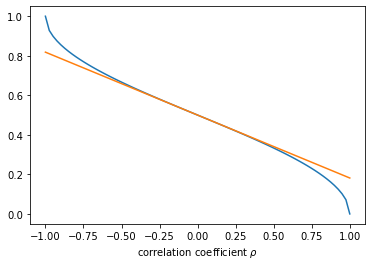

In [59]:
x = np.linspace(-1., 1., 80)
plt.plot(x,np.arccos(x)/np.pi)
plt.plot(x,1/2-x/np.pi)
plt.xlabel(r'correlation coefficient $\rho$')

In [39]:
triad(df,1049,'Sg_').corrs

[0.3142645334808142, 0.48904012836715643, 0.5805375970220241]

In [34]:
class triad:
    def __init__(self, df, group, signal_type):
        cols = [c for c in df.columns if c[0]==group and c[1].startswith(signal_type)]
        #print(cols)
        cosine_simi = np.corrcoef(df[cols].values.T)
        angular_dist = np.arccos(cosine_simi)/np.pi
        self.corrs = sorted([angular_dist[0,1], angular_dist[1,2], angular_dist[2,0]])
        
        self._triangle_vertices()
    
    def _triangle_vertices(self):
        corrs = self.corrs
        a,b,c = corrs[1], corrs[2], corrs[0]
        cos_alpha = (b**2 + c**2 - a**2)/(2*b*c)
        if cos_alpha > 1:
            print(corrs)
            raise ValueError("Triangle vertices encountered miscalculation")
        sin_alpha = np.sqrt(1-cos_alpha**2)
        A = np.zeros(2)
        C = np.array((b*cos_alpha, b*sin_alpha))
        B = np.array((c,0))
        self.vertices = np.vstack([A,B,C,A])

    def to_2d_point(self):
        return np.array([ self.corrs[0], (self.corrs[1]+self.corrs[2])/2 ])
    
    def to_triangle(self, plt=False):
        if plt:
            return self.vertices[:,0], self.vertices[:,1]
        return self.vertices;
    
    def triangle_ratio(self):
        p = self.to_2d_point()
        return p[1]/p[0]

In [5]:
def triangle_vertices(df, group,signal_type):
    # Using the order of vertices in wikipedia under "Law of Cosines"
    # A = (0,0)
    # B = (x1,0)
    # a < b
    cols = [c for c in df.columns if c[0]==group and c[1].startswith(signal_type)]
    #print(cols)
    cosine_simi = np.corrcoef(df[cols].values.T)
    angular_dist = np.arccos(cosine_simi)/np.pi
    corrs = sorted([angular_dist[0,1], angular_dist[1,2], angular_dist[2,0]])
    #print(corrs)
    a,b,c = corrs[1], corrs[2], corrs[0]
    #print("{:.2f}".format((a+b)/(a+c)))
    cos_alpha = (b**2 + c**2 - a**2)/(2*b*c)
    if cos_alpha > 1:
        print(corrs)
        return
    sin_alpha = np.sqrt(1-cos_alpha**2)
    A = np.zeros(2)
    C = np.array((b*cos_alpha, b*sin_alpha))
    B = np.array((c,0))
    return np.vstack([A,B,C,A])
    
    

In [6]:
def extract_ratio(p):
    a = np.linalg.norm(np.diff(p,axis=0),axis=1) # The lengths of the sides
    return np.array([a.mean(), (a[2]+a[1])/(a[1]+a[0])]) # side length and long-to-short sides ratio

In [7]:
def plot_for_groups(signal_type):
    plt.subplots(7,3, figsize=(8,16))
    triangs = np.empty((4,2,20))
    rats = np.empty((20,2))
    for i,g in enumerate([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                         1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],1):
        p = triangle_vertices(df,g,signal_type)
        plt.subplot(7,3,i)
        plt.plot(p[:,0],p[:,1],'.-')
        plt.title("{}".format(g))
        rat =extract_ratio(p)
        plt.text(p[:,0].max()/2, p[:,1].max()*0.2,"{:.3f}".format(rat[1]))
        plt.gca().set_aspect('equal') 
        triangs[:,:,i-1]=p
        rats[i-1,:] = rat
    plt.tight_layouclasst()
    print("{:.3}  ± {:.2f} ".format(rats[:,1].mean(),rats[:,1].std()))
    return triangs, rats

In [29]:
tr={}
tr[1001] =  triad(df, 1001, 'Sg_')

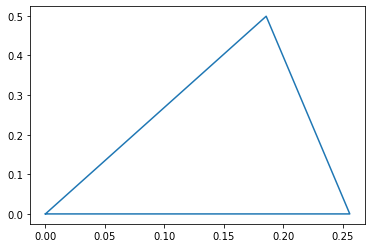

In [20]:
plt.plot(*tr[1001].to_triangle(True))

In [35]:
tr[1001].to_2d_point()
tr[1001].corrs
tr[1001].traingle_ratio()

2.025013353447371

In [30]:
tr[1001].to_triangle()

array([[0.        , 0.        ],
       [0.25587108, 0.        ],
       [0.1855842 , 0.4989822 ],
       [0.        , 0.        ]])

In [27]:
triangle_vertices(df,1001,'Sg_')

array([[0.        , 0.        ],
       [0.25587108, 0.        ],
       [0.1855842 , 0.4989822 ],
       [0.        , 0.        ]])

In [32]:
np.linalg.norm(np.diff(tr[1001].to_triangle(),axis=0),axis=1)

array([0.25587108, 0.50390821, 0.5323765 ])

In [ ]:
triangs_freestyle, rats_freestyle = plot_for_groups('Sg_')

In [ ]:
#bases_fs = triangs_freestyle[1,0,:]
plt.scatter(rats_freestyle[:,0], rats_freestyle[:,1])

In [ ]:
rats_freestyle

In [ ]:
triangs_resid, rats_resid  = plot_for_groups('resid')

In [ ]:
plt.scatter(rats_resid[:,0], rats_resid[:,1])

In [ ]:
plot_for_groups('rms_')

In [ ]:
plot_for_groups('Raw_')

In [ ]:
sg_rats_interaction = np.array([1.28589801, 1.08080804, 1.30721235, 1.25149081, 1.08867095,
       1.07652876, 1.19221213, 1.21842693, 1.03906657, 1.05316082,
       1.42415502, 1.41584971, 1.0520917 , 1.05667846, 1.09212165,
       1.14198762, 1.23782323, 1.28673302, 1.08631927, 1.1771771 ])

In [ ]:
plt.scatter(sg_rats_interaction, sg_rats_freestyle)

In [ ]:
print(np.array2string(np.vstack([zscore(sg_rats_interaction), zscore(sg_rats_freestyle)]),
                      precision=3))


In [ ]:
sg_rats_freestyle.shape, sg_rats_interaction.shape

In [ ]:
plt.scatter(zscore(sg_rats_interaction), zscore(sg_rats_freestyle))